# EDA del archivo Internet penetration cada 100 hogares


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importo 
ruta_al_archivo = '../DATA/01-Internet_Penetracion.csv'
df = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [3]:
#observo resultado
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


In [4]:
#Se ve la composicion
df.info()#hay 3 columnas nulas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


In [5]:
# Lista de nombres de columnas que deseo eliminar
columnas_a_eliminar = ['Unnamed: 4', 'Unnamed: 5','Unnamed: 6']
# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

In [6]:
# Convertir la columna 'Accesos por cada 100 hogares' a números y manejar los valores no válidos
df['Accesos por cada 100 hogares'] = pd.to_numeric(df['Accesos por cada 100 hogares'].str.replace(',', '.'), errors='coerce')
# Ordenar el DataFrame por la columna 'Accesos por cada 100 hogares' de mayor a menor, para ver valores maximos
df = df.sort_values(by='Accesos por cada 100 hogares', ascending=False)
# Contar los valores mayores a 100 y menores a 0
mayores_a_100 = df[df['Accesos por cada 100 hogares'] > 100].shape[0]
menores_a_0 = df[df['Accesos por cada 100 hogares'] < 0].shape[0]
# Imprimir los resultados
print("Valores mayores a 100:", mayores_a_100)
print("Valores menores a 0:", menores_a_0)

Valores mayores a 100: 37
Valores menores a 0: 0


Exploremos valores maximos y minimos..

In [7]:
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
529,2017,2,Capital Federal,124.06
481,2017,4,Capital Federal,122.90
1,2022,4,Capital Federal,122.73
25,2022,3,Capital Federal,122.28
505,2017,3,Capital Federal,121.86


In [8]:
df.tail(20)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
450,2018,2,San Luis,15.15
474,2018,1,San Luis,15.15
597,2016,4,Santiago Del Estero,15.07
573,2017,1,Santiago Del Estero,14.70
549,2017,2,Santiago Del Estero,14.12
498,2017,4,San Luis,10.59
786,2014,4,San Luis,9.79
834,2014,2,San Luis,9.72
762,2015,1,San Luis,9.72
810,2014,3,San Luis,9.71


El resultado muestra que los datos mas altos estan en capital y los mas bajos en los primeros años en san luis y algunos de santiago del estero en 2017

In [9]:
# Ajustar los valores mayores a 100 a 100, no puede habar mas de 100 accesos cada 100 hogares
df.loc[df['Accesos por cada 100 hogares'] > 100, 'Accesos por cada 100 hogares'] = 100

In [10]:
#vemos el resultado, capital tiene 100
df = df.sort_index()
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,100.00
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [11]:
df.describe()#Observamos una descripcion con los detalles del df

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.050336
std,2.583484,1.118682,21.836565
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,100.000000


In [12]:
df['Provincia'].unique()#vemos que estan las 23 provincias y la capital

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Realizo un grafico para ver la evolucion del acceso a internet cada 100 hogares por provincia

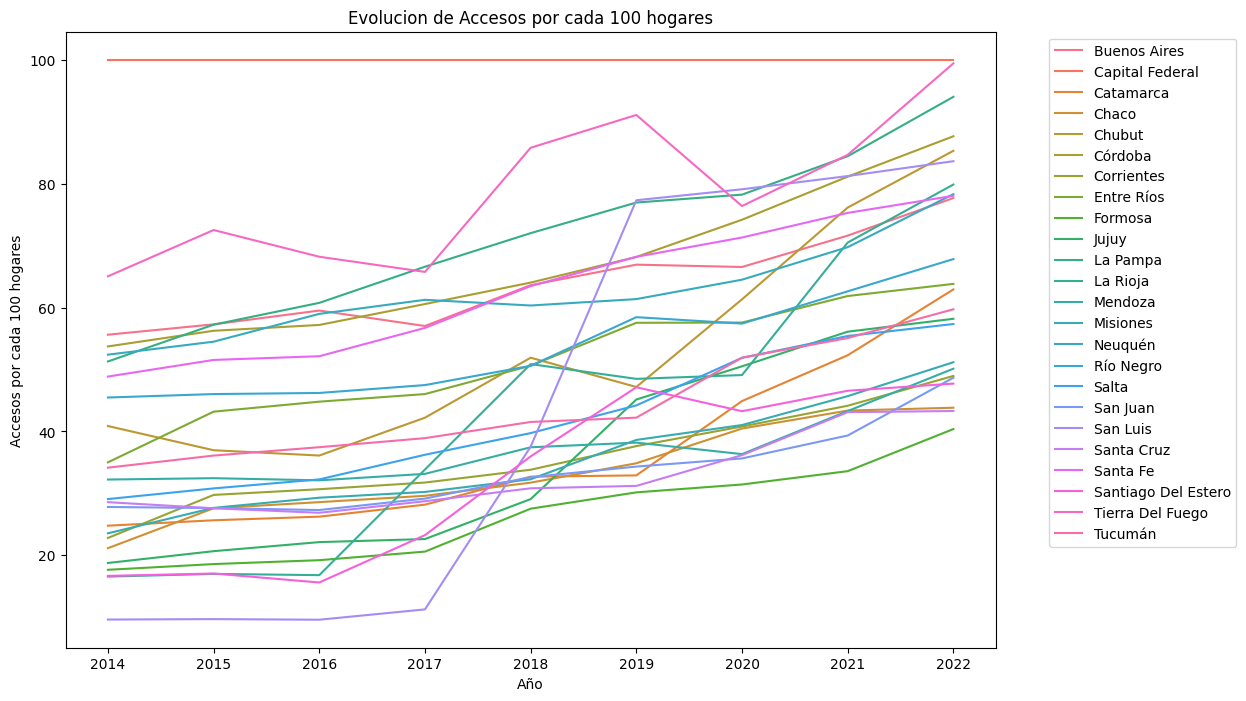

In [13]:
plt.figure(figsize=(12, 8))

# Crea un gráfico de líneas para todas las provincias
sns.lineplot(data=df, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', err_style=None)

plt.title("Evolucion de Accesos por cada 100 hogares")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")

# Ajusta la leyenda para que no se superponga
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Se observa una clara tendencia al alza en cada una de las provincias y un acceso del 100% en la capital federal (en realidad eran mas pero se hizo un ajuste anteriormente para que no sobrepase los 100), esto se debe al facil acceso por la densidad de poblacion y los altos ingresos de la zona.

Procedemos a evaluar en detalle la evolucion de tierra del fuego, quien esta segunda en accesos, San Luis que arranca siendo la peor provincia pero con una gran evolucion a partir del año 2017 llegando a posicionarse como pionera a principios de 2019, y por ultimo a formosa, quien sigue siendo la peor en la actualidad

(9.35, 100.0)

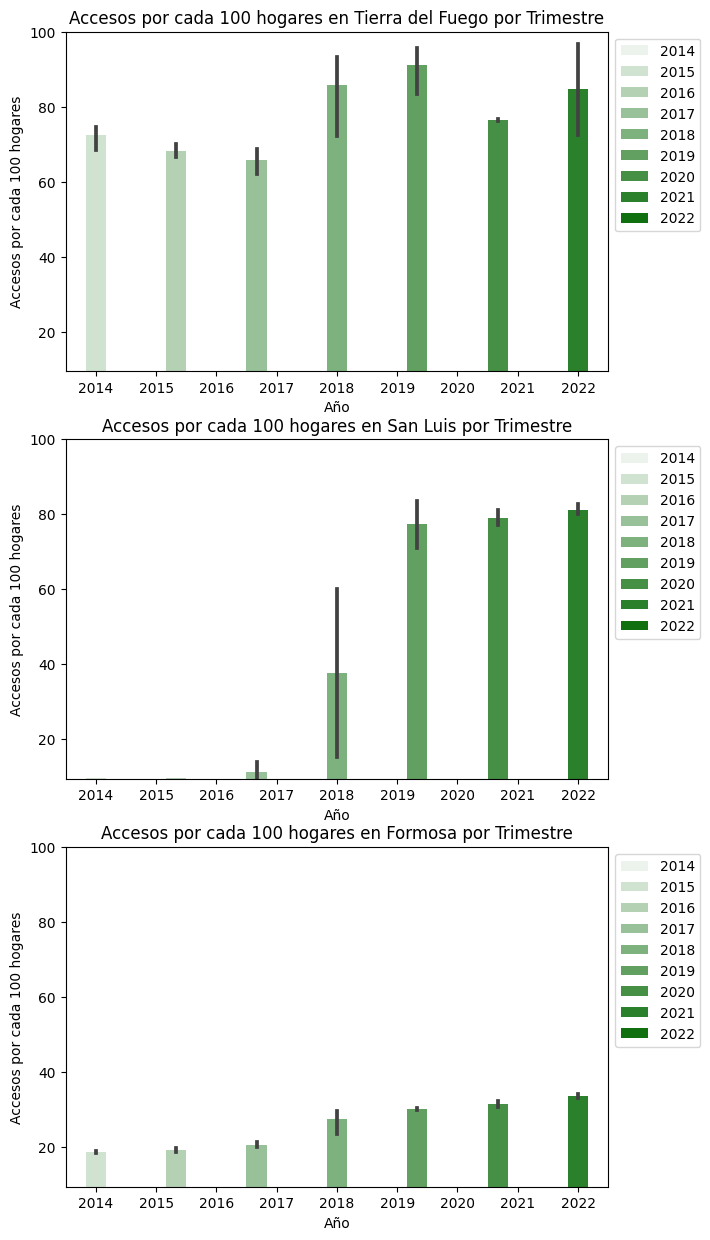

In [14]:
# Filtrar los datos para la provincia de Tierra del Fuego
Tierra_del_fuego = df[df['Provincia'] == 'Tierra Del Fuego']
# Filtrar los datos para la provincia de San Luis
San_luis = df[df['Provincia'] == 'San Luis']
# Filtrar los datos para la provincia de Formosa
Formosa = df[df['Provincia'] == 'Formosa']

# Obtener los límites del eje y para asegurar la misma escala en todos los gráficos
y_min = min(
    Tierra_del_fuego['Accesos por cada 100 hogares'].min(),
    San_luis['Accesos por cada 100 hogares'].min(),
    Formosa['Accesos por cada 100 hogares'].min()
)
y_max = max(
    Tierra_del_fuego['Accesos por cada 100 hogares'].max(),
    San_luis['Accesos por cada 100 hogares'].max(),
    Formosa['Accesos por cada 100 hogares'].max()
)

# Crear figura
plt.figure(figsize=(7, 15))  

# Gráfico para Tierra del Fuego
plt.subplot(3, 1, 1)  # 2 filas, 2 columnas, primer subgráfico
sns.barplot(data=Tierra_del_fuego, x='Año', y='Accesos por cada 100 hogares', hue='Año', width=3, color='green')
plt.title("Accesos por cada 100 hogares en Tierra del Fuego por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.ylim(y_min, y_max)  # Establecer límites del eje y

# Gráfico para San Luis
plt.subplot(3, 1, 2)  # 2 filas, 2 columnas, segundo subgráfico
sns.barplot(data=San_luis, x='Año', y='Accesos por cada 100 hogares', hue='Año', width=3, color='green')
plt.title("Accesos por cada 100 hogares en San Luis por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(y_min, y_max)  # Establecer límites del eje y
 
# Gráfico para Formosa
plt.subplot(3, 1, 3)  # 2 filas, 2 columnas, tercer subgráfico
sns.barplot(data=Formosa, x='Año', y='Accesos por cada 100 hogares', hue='Año', width=3, color='green')
plt.title("Accesos por cada 100 hogares en Formosa por Trimestre")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(y_min, y_max)  # Establecer límites del eje y


En el grafico anterior se ve la evolucion año a año del acceso a internet en las tres provincias mencionadas, mostrando ademas la variabilidad, siendo esta la barra chiquita en la parte superior. En Tierra del fuego se observa un numero de accesos altos por encima del 60%. En el caso de San Luis se ve claramente el crecimiento del acceso en 2018, esto se puede asociar a una politica publica impulsada por el gobierno provincial que consistia en poner puntos de acceso gratis a internet wireless por medio de antenas publicas de wifi. Por ultimo, en formosa se ve un estancamiento en torno a los 20-30 accesos, lo que demuestra una clara falta de inversion en el sector, esto puede tener origen en los bajos recursos, en la poca poblacion extendida en gran territorio (esto afecta ya que, en el caso de fibra optica, hay que hacer grandes inveriones para llegar a poca gente)

Para oservar lo anterior, se realiza un grafico de argentina con las provincias, sus poblaciones respectivas y la superficie de cada una, los datos se sacan de la web

In [15]:
datos = {
    'Provincia': ['CABA', 'Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
    'Capital': ['', 'La Plata', 'San Fernando del Valle de Catamarca', 'Resistencia', 'Rawson', 'Córdoba', 'Corrientes', 'Paraná', 'Formosa', 'San Salvador de Jujuy', 'Santa Rosa', 'La Rioja', 'Mendoza', 'Posadas', 'Neuquén', 'Viedma', 'Salta', 'San Juan', 'San Luis', 'Río Gallegos', 'Santa Fe', 'Santiago del Estero', 'Ushuaia', 'San Miguel de Tucumán'],
    'Poblacion': [3075646, 17541141, 415438, 1204541, 618994, 3760450, 1120801, 1385961, 605193, 770881, 358428, 393531, 1990338, 1261294, 664057, 747610, 1424397, 781217, 508328, 365698, 3536418, 978313, 173715, 1694656],
    'Superficie_km2': [205.9, 305907.4, 101486.1, 99763.3, 224302.3, 164707.8, 89123.3, 78383.7, 75488.3, 53244.2, 143492.5, 91493.7, 149069.2, 29911.4, 94422, 202168.6, 155340.5, 88296.2, 75347.1, 244457.5, 133249.1, 136934.3, 910324.4, 22592.1],
    'Densidad_hab_km2': [14937.6, 57.3, 4.1, 12.1, 2.8, 22.8, 12.6, 17.7, 8.0, 14.5, 2.5, 4.3, 13.4, 42.2, 7.0, 3.7, 9.2, 8.8, 6.7, 1.5, 26.5, 7.1, 0.2, 75.0],
}
# Crear DataFrame
df_provincias = pd.DataFrame(datos)
# Mostrar DataFrame resultante
df_provincias.head()

,Provincia,Capital,Poblacion,Superficie_km2,Densidad_hab_km2
0,CABA,,3075646,205.9,14937.6
1,Buenos Aires,La Plata,17541141,305907.4,57.3
2,Catamarca,San Fernando del Valle de Catamarca,415438,101486.1,4.1
3,Chaco,Resistencia,1204541,99763.3,12.1
4,Chubut,Rawson,618994,224302.3,2.8


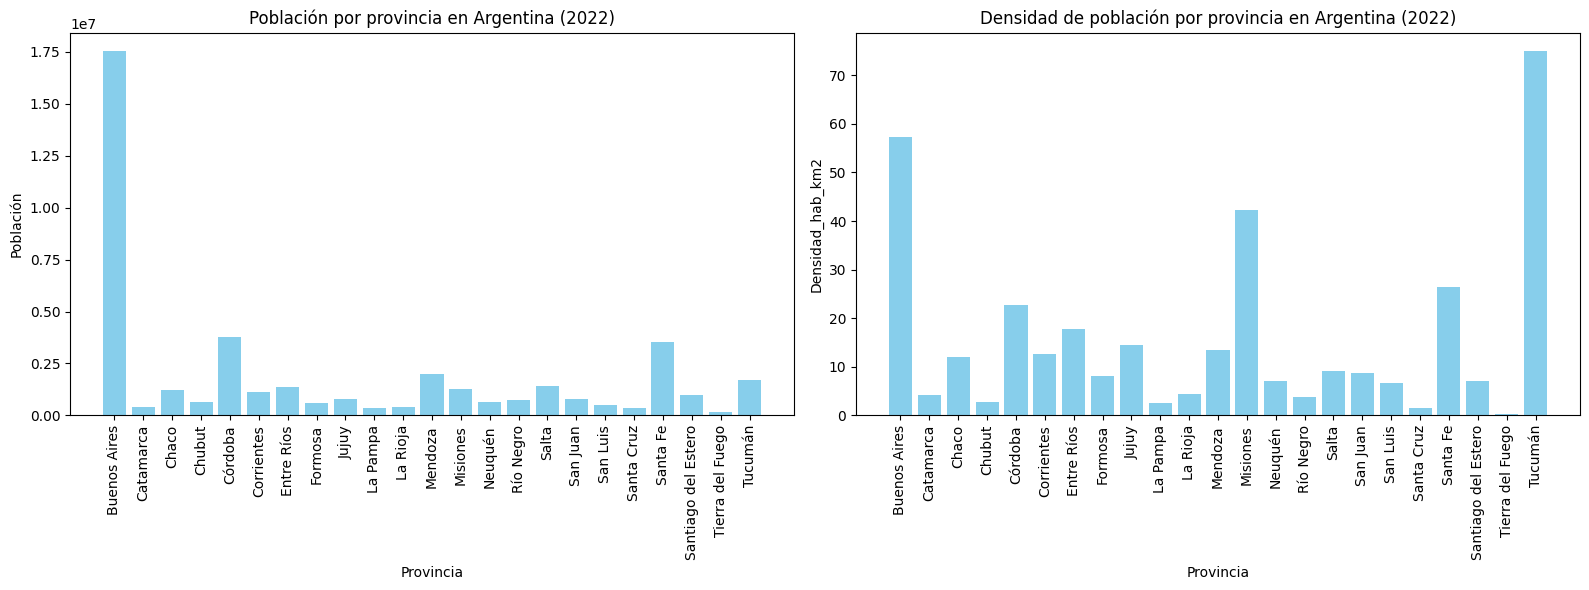

In [16]:
# Excluir CABA, para visualizar mejor el grafico
df_provincias_sin_CABA = df_provincias[df_provincias['Provincia'] != 'CABA']
df_poblacion = df_provincias_sin_CABA[['Provincia', 'Poblacion']]
df_densidad = df_provincias_sin_CABA[['Provincia', 'Densidad_hab_km2']]
# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Población por provincia
axes[0].bar(df_provincias_sin_CABA['Provincia'], df_provincias_sin_CABA['Poblacion'], color='skyblue')
axes[0].set_title('Población por provincia en Argentina (2022)')
axes[0].set_xlabel('Provincia')
axes[0].set_ylabel('Población')
axes[0].tick_params(axis='x', rotation=90)
# Gráfico 2: Densidad de población por provincia
axes[1].bar(df_provincias_sin_CABA['Provincia'], df_provincias_sin_CABA['Densidad_hab_km2'], color='skyblue')
axes[1].set_title('Densidad de población por provincia en Argentina (2022)')
axes[1].set_xlabel('Provincia')
axes[1].set_ylabel('Densidad_hab_km2')
axes[1].tick_params(axis='x', rotation=90)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Si bien no se confirmo lo de Formosa de ser la provincia con menor densidad poblacional, si que esta por debajo del promedio el cual es de 12.4 y formosa tiene 8; por lo que debe estar relacionado a los bajos ingresos y baja inversion del sector

Se realiza un grafico para ver los ingresos a nivel nacional, los datos se sacan de la web

In [17]:
#importo 
ruta_al_archivo = '../DATA/w_mean_todos.csv'
salarios = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [18]:
salarios.head()

,fecha,zona_prov,letra,w_mean
0,2013-01-01,BUENOS AIRES,A,5230
1,2013-01-01,BUENOS AIRES,B,15376
2,2013-01-01,BUENOS AIRES,C,10191
3,2013-01-01,BUENOS AIRES,D,24148
4,2013-01-01,BUENOS AIRES,E,11562


Para tener un dato mas objetivo, se pasa el salario a usd debido a la inflacion en el pais. Se toma el valor de usd en julio de cada año

In [19]:
salarios['fecha'] = pd.to_datetime(salarios['fecha'])

# Agregar la columna 'Año' al DataFrame original
salarios['Año'] = salarios['fecha'].dt.year

# Crear un diccionario con el valor del USD blue en julio de cada año
valor_usd_blue_julio = {
    2011: 4.34, 2012: 6.29, 2013: 8.00, 2014: 12.60, 2015: 14.79, 2016: 15.07, 2017: 17.65,
    2018: 27.45, 2019: 43.70, 2020: 131.00, 2021: 175.50, 2022: 234.00, 2023: 545.00
}

# Crear una nueva columna 'Valor_USD_Blue_Julio' en el DataFrame original
salarios['Valor_USD_Blue_Julio'] = salarios['Año'].map(valor_usd_blue_julio)

# Crear la nueva columna 'Salario_USD'
salarios['Salario_USD'] = salarios['w_mean'] / salarios['Valor_USD_Blue_Julio']

# Imprimir el DataFrame resultante
salarios.head()

,fecha,zona_prov,letra,w_mean,Año,Valor_USD_Blue_Julio,Salario_USD
0,2013-01-01,BUENOS AIRES,A,5230,2013,8.0,653.750
1,2013-01-01,BUENOS AIRES,B,15376,2013,8.0,1922.000
2,2013-01-01,BUENOS AIRES,C,10191,2013,8.0,1273.875
3,2013-01-01,BUENOS AIRES,D,24148,2013,8.0,3018.500
4,2013-01-01,BUENOS AIRES,E,11562,2013,8.0,1445.250


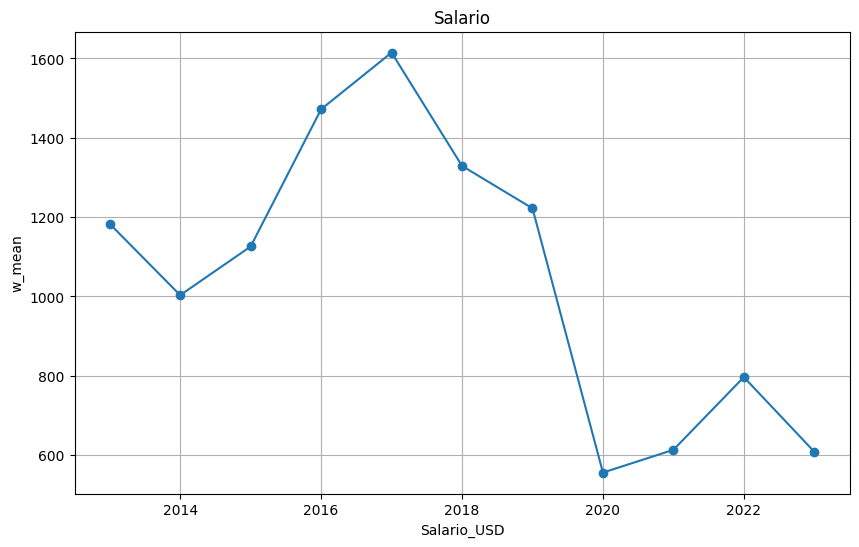

In [20]:
# Agrupar por año y calcular el promedio de 'w_mean'
salario_promedio_por_anio = salarios.groupby('Año')['Salario_USD'].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(salario_promedio_por_anio['Año'], salario_promedio_por_anio['Salario_USD'], marker='o')
plt.title('Salario')
plt.xlabel('Salario_USD')
plt.ylabel('w_mean')
plt.grid(True)
plt.show()

Se observa una caida que comienza en 2017, debido a problemas cambiarios iniciados con la elevacion de las tasas de interes bancarias  y en consecuencia la depreciacion del peso argentino. Tambien se ve una gran caida en el año de la pandemia, con una lenta recuperacion hasta 2022, con una nueva caida en el ultimo año.

In [21]:
# Convertir la columna 'fecha' a datetime durante la carga del DataFrame
salarios['fecha'] = pd.to_datetime(salarios['fecha'])
# Filtrar datos solo para el año 2021, para observar los ingresos dentro de los años graficados anteriormente
salario_2022 = salarios[salarios['fecha'].dt.year == 2021]

# Agrupar por 'zona_prov' y calcular el promedio de 'w_mean'
promedio_por_provincia = salario_2022.groupby('zona_prov')['w_mean'].mean().reset_index()
# Ordenar de menor a mayor según la columna 'w_mean'
promedio_por_provincia = promedio_por_provincia.sort_values(by='w_mean')
promedio_por_provincia.head(5)

,zona_prov,w_mean
21,SANTIAGO DEL ESTERO,74985.934211
11,LA RIOJA,79550.938596
13,MISIONES,82398.929167
6,CORRIENTES,86287.820833
8,FORMOSA,88280.855263


Formosa esta en el top 5 de provincias con menos ingresos, dentro de un pais de bajos ingresos a nivel regional, por lo tanto es un factor importante a tener en cuenta en el bajo acceso

# EDA al archivo resumen de Internet penetracion

In [22]:
#importo 
ruta_al_archivo = '../DATA/02-Internet_Penetracion.csv'
df2 = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [23]:
#observo resultado
df2.head(40)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021
5,2021,3,"70,58","21,98",Jul-Sept 2021
6,2021,2,"69,24","21,55",Abr-Jun 2021
7,2021,1,"67,95","21,13",Ene-Mar 2021
8,2020,4,"67,62","21,01",Oct-Dic 2020
9,2020,3,"66,31","20,59",Jul-Sept 2020


In [24]:
#Se ve la composicion
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [25]:
# Convertir la columna 'Accesos por cada 100 hogares' a números y manejar los valores no válidos
df2['Accesos por cada 100 hogares'] = pd.to_numeric(df2['Accesos por cada 100 hogares'].str.replace(',', '.'), errors='coerce')

# Ordenar el DataFrame por la columna 'Accesos por cada 100 hogares' de mayor a menor, para ver valores maximos
df2 = df2.sort_values(by='Accesos por cada 100 hogares', ascending=False)

# Contar los valores mayores a 100 y menores a 0
mayores_a_100 = df2[df2['Accesos por cada 100 hogares'] > 100].shape[0]
menores_a_0 = df2[df2['Accesos por cada 100 hogares'] < 0].shape[0]

# Imprimir los resultados
print("Valores mayores a 100:", mayores_a_100)
print("Valores menores a 0:", menores_a_0)

Valores mayores a 100: 0
Valores menores a 0: 0


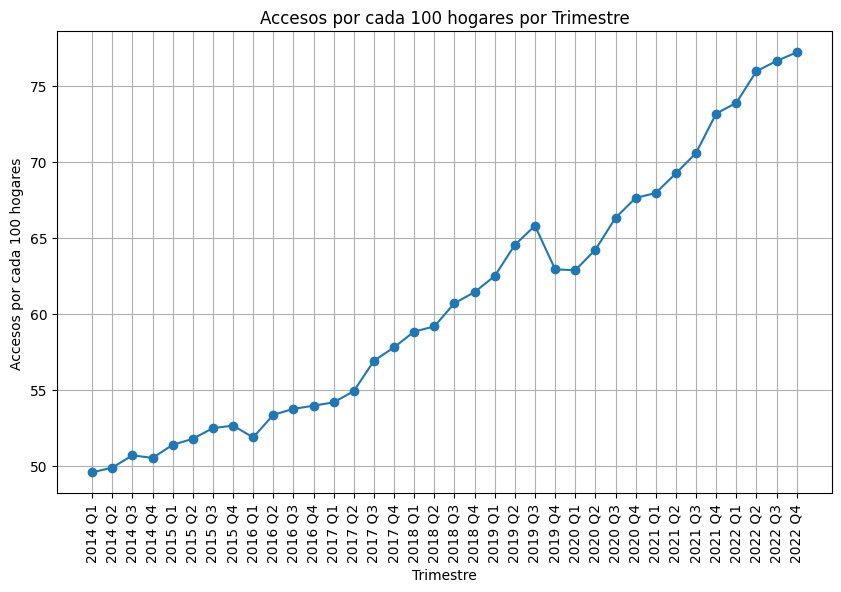

In [26]:
# Crear una nueva columna 'Fecha' combinando 'Año' y 'Trimestre'
df2['Fecha'] = df2['Año'].astype(str) + ' Q' + df2['Trimestre'].astype(str)
# Ordenar el DataFrame por la columna 'Fecha' de menor a mayor
df2 = df2.sort_values(by='Fecha')

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df2['Fecha'], df2['Accesos por cada 100 hogares'], marker='o')
plt.title('Accesos por cada 100 hogares por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Se ve una clara y obvia tendencia al alza debido a la importancia que va cobrando el internet a traves del tiempo, excepto a la caida a comienzos del 2019, la cual se puede asociar como consecuencia de la crisis economica del pais

In [27]:
# Convertir la columna 'Accesos por cada 100 hogares' a números y manejar los valores no válidos
df2['Accesos por cada 100 hab'] = pd.to_numeric(df2['Accesos por cada 100 hab'].str.replace(',', '.'), errors='coerce')

# Ordenar el DataFrame por la columna 'Accesos por cada 100 hogares' de mayor a menor, para ver valores maximos
df2 = df2.sort_values(by='Accesos por cada 100 hab', ascending=False)

# Contar los valores mayores a 100 y menores a 0
mayores_a_100 = df2[df2['Accesos por cada 100 hab'] > 100].shape[0]
menores_a_0 = df2[df2['Accesos por cada 100 hab'] < 0].shape[0]

# Imprimir los resultados
print("Valores mayores a 100:", mayores_a_100)
print("Valores menores a 0:", menores_a_0)

Valores mayores a 100: 0
Valores menores a 0: 0


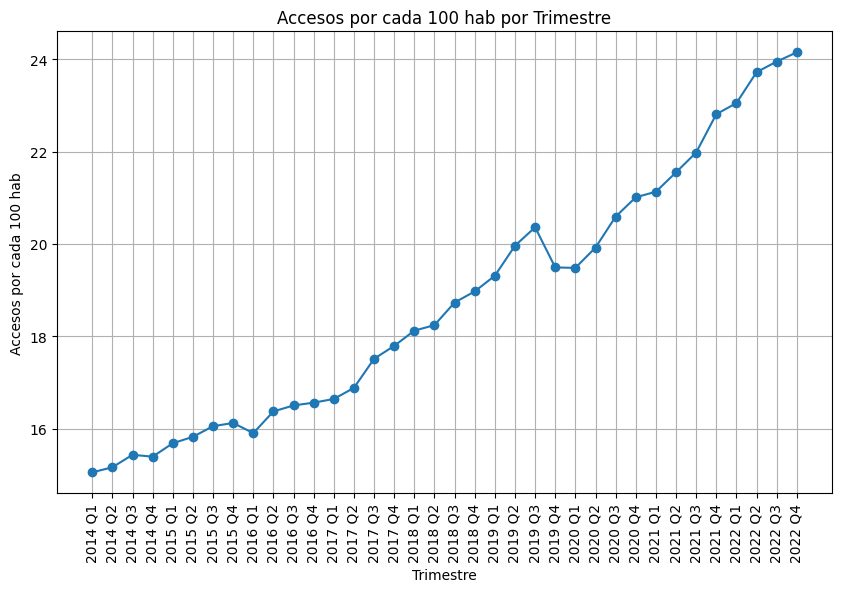

In [28]:
# Ordenar el DataFrame por la columna 'Fecha' de menor a mayor
df2 = df2.sort_values(by='Fecha')
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df2['Fecha'], df2['Accesos por cada 100 hab'], marker='o')
plt.title('Accesos por cada 100 hab por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hab')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Se corresponde con el grafico anterior, mostrando la misma tendencia por las iguales razones

## Exporto csv para usar en power bi

In [29]:
import os

ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'Internet_penetration.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df.to_csv(ruta_completa, index=False)

In [30]:
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'df_provincias.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df_provincias.to_csv(ruta_completa, index=False)

In [31]:
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'Internet_penetration_resumen.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df2.to_csv(ruta_completa, index=False)

In [32]:
salarios
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'salarios.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

salarios.to_csv(ruta_completa, index=False)